In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to python environment

In [2]:
data = pd.read_excel(r'C:\Users\useme\Downloads\iris (1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking missing values

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

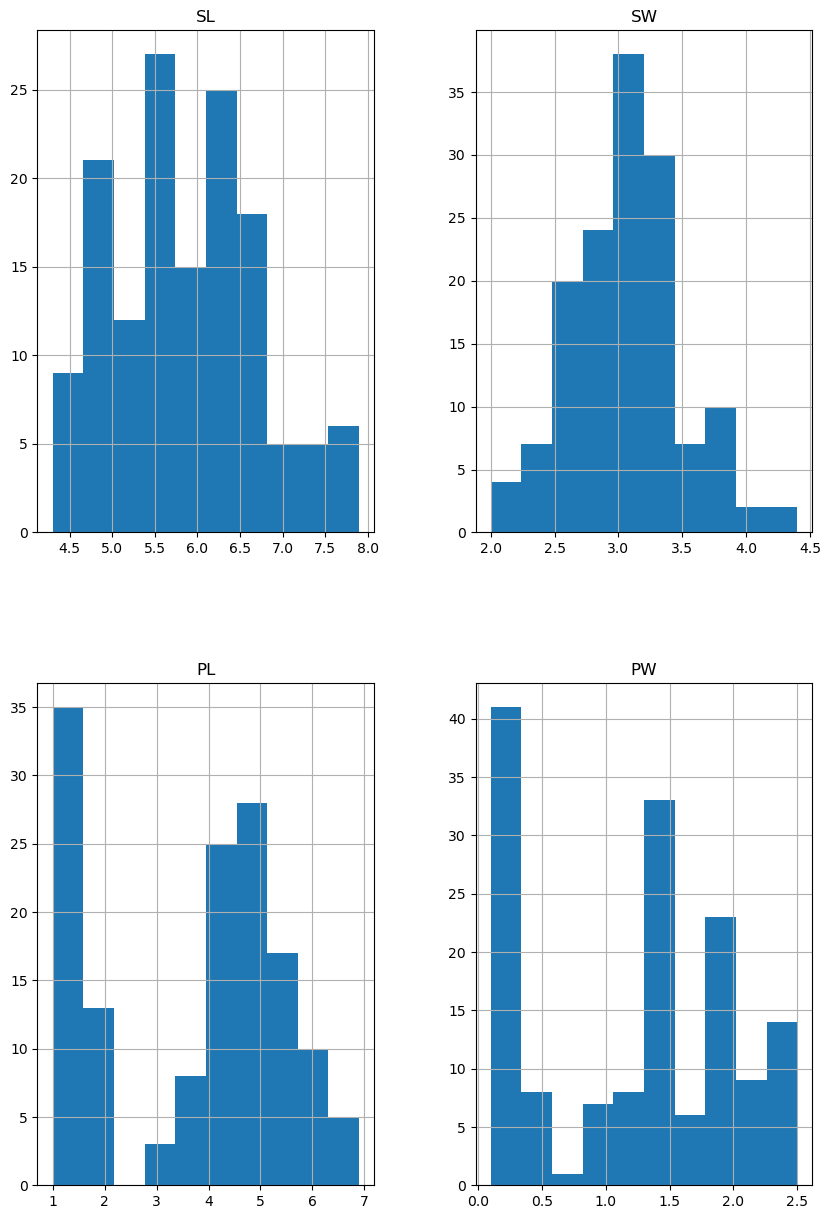

In [8]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,15))
plt.show()

In [9]:
col = ['SL','SW','PL']
for i in col:
    data[i]=data[i].fillna(data[i].median())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Outlier detection

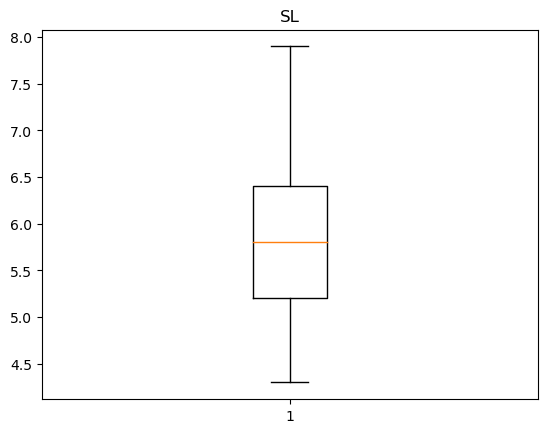

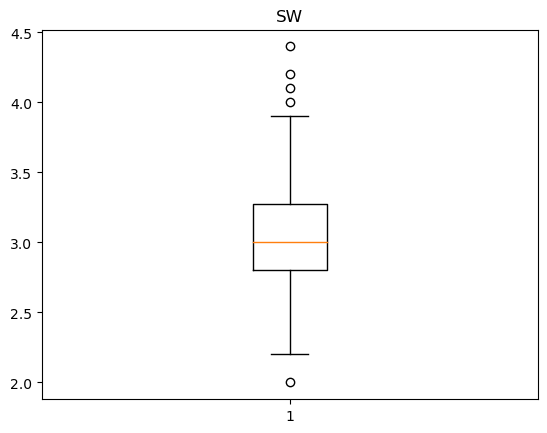

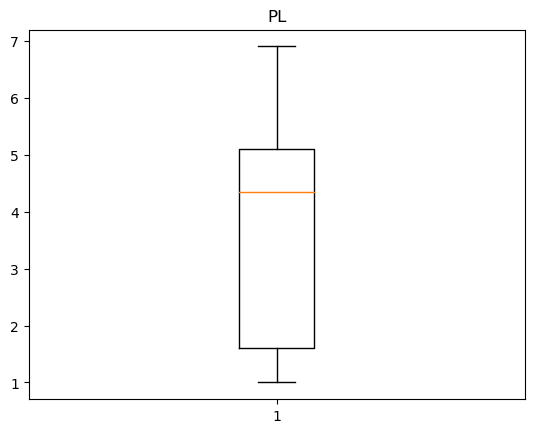

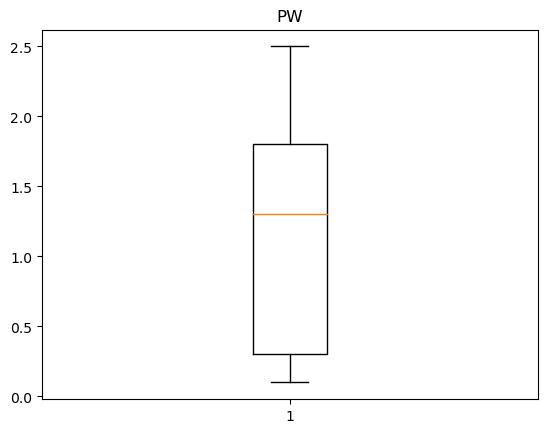

In [11]:
num_col = ['SL','SW','PL','PW']
for x in num_col:
    plt.boxplot(data[x])
    plt.title(x)
    plt.show()
    

In [12]:
# Outlier handling of 'SW' column

Q1 = data['SW'].quantile(0.25)
Q2 = data['SW'].quantile(0.50)
Q3 = data['SW'].quantile(0.75)

print('Q1= ',Q1)
print('Q2= ',Q2)
print('Q3= ',Q3)

IQR = Q3-Q1
print('IQR= ',IQR)

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('Upper limit= ',up_lim)
print('Lower limit= ',low_lim)

outlier = []
for i in data['SW']:
    if (i<low_lim) or (i>up_lim):
        outlier.append(i)
print('Outlier= ',outlier)


Q1=  2.8
Q2=  3.0
Q3=  3.275
IQR=  0.4750000000000001
Upper limit=  3.9875
Lower limit=  2.0874999999999995
Outlier=  [4.0, 4.4, 4.1, 4.2, 2.0]


In [13]:
data['SW'] = np.where(data['SW'] > up_lim, up_lim, np.where(data['SW'] < low_lim, low_lim, data['SW']))

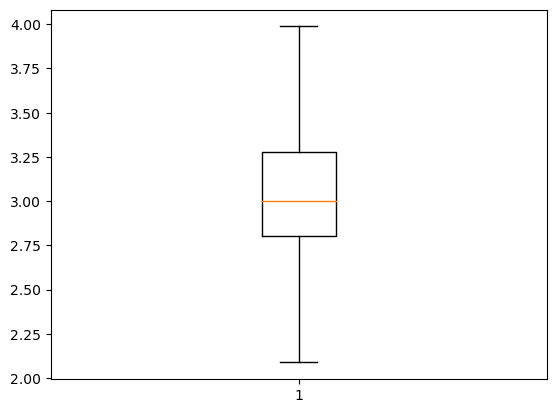

In [14]:
#Boxplot of 'SW' after outlier handling
plt.boxplot(data['SW'])
plt.show()

# Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
data['Classification'] = le.fit_transform(data['Classification'])

In [18]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
data['Classification'].unique()

array([0, 1, 2])

# #Classification models before scaling the dataset

In [20]:
# splitting data to feature and target
x = data.drop(['Classification'],axis=1)
y = data['Classification']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# 1. Logistic Regression

In [22]:
#Model creation
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

C:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# predictions using test data
y_pred_lr = logit_model.predict(x_test)

In [24]:
y_pred_lr

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('Precision = ',precision_score(y_test,y_pred_lr,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_lr,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_lr))

Accuracy =  0.9736842105263158
Precision =  0.9722222222222222
Recall =  0.9777777777777779
f1 score =  0.9740129935032483
Confusion matrix =
  [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


# 2. kNN

In [26]:
#Choosing k value
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    Classifier.fit(x_train,y_train)
    y_pred_knn = Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

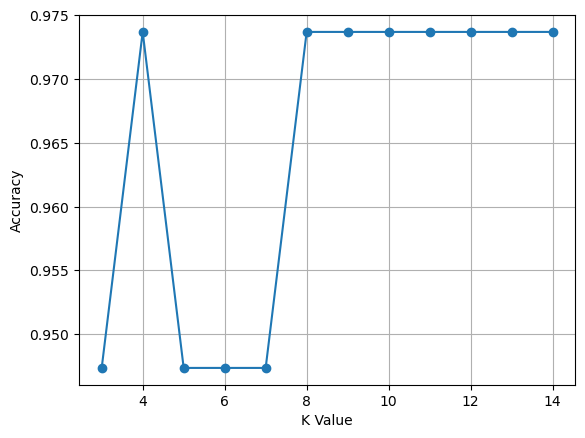

In [27]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()

In [28]:
# Model creation using selected k value
Classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)
Classifier.fit(x_train,y_train)
y_pred_knn = Classifier.predict(x_test)

In [29]:
#Checking the accuracy of the model
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_knn,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_knn))

Accuracy =  0.9736842105263158
Precision =  0.9722222222222222
Recall =  0.9777777777777779
f1 score =  0.9740129935032483
Confusion matrix =
  [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


# 3. SVM Model

In [30]:
#Using linear kernel

from sklearn.svm import SVC
svmclf = SVC(kernel='linear',random_state=42)
svmclf.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [31]:
y_pred_svm=svmclf.predict(x_test)

In [32]:
#Checking the accuracy of the model
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('Precision = ',precision_score(y_test,y_pred_svm,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))
cm = confusion_matrix(y_test,y_pred_svm)
print('Confusion matrix =\n ',cm)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [33]:
# creating a dataframe for a array-formatted confusion matrix
cm_df = pd.DataFrame(cm,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                     columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

In [34]:
cm_df

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,15,0,0
Iris-versicolor,0,11,0
Iris-virginica,0,0,12


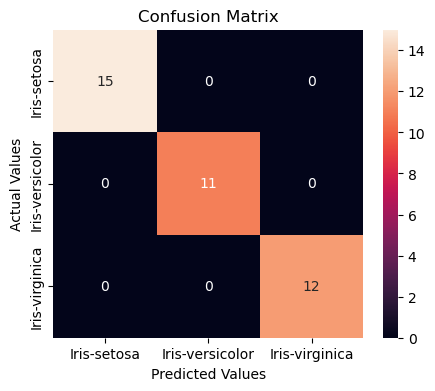

In [35]:
#plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [36]:
#Using polynomial kernel

svmclf1 = SVC(kernel='poly',random_state=42)
svmclf1.fit(x_train,y_train)

SVC(kernel='poly', random_state=42)

In [37]:
y_pred_svm1=svmclf1.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm1))
print('Precision = ',precision_score(y_test,y_pred_svm1,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm1,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_svm1,average='macro'))
cm = confusion_matrix(y_test,y_pred_svm1)
print('Confusion matrix =\n ',cm)

Accuracy =  0.9736842105263158
Precision =  0.9743589743589745
Recall =  0.9696969696969697
f1 score =  0.9707936507936509
Confusion matrix =
  [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


In [38]:
#Using radial basis function kernel

svmclf2 = SVC(kernel='rbf',random_state=42)
svmclf2.fit(x_train,y_train)

SVC(random_state=42)

In [39]:
y_pred_svm2=svmclf2.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm2))
print('Precision = ',precision_score(y_test,y_pred_svm2,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm2,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_svm2,average='macro'))
cm = confusion_matrix(y_test,y_pred_svm2)
print('Confusion matrix =\n ',cm)

Accuracy =  0.9736842105263158
Precision =  0.9722222222222222
Recall =  0.9777777777777779
f1 score =  0.9740129935032483
Confusion matrix =
  [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


Inference : Linear kernel gives the best SVM model

# 4. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
y_pred_dt = dt_clf.predict(x_test)

In [42]:
print('Accracy is: ',accuracy_score(y_test,y_pred_dt))
print('Precision = ',precision_score(y_test,y_pred_dt,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_dt,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_dt))

Accracy is:  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [43]:
from sklearn import tree

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.206\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

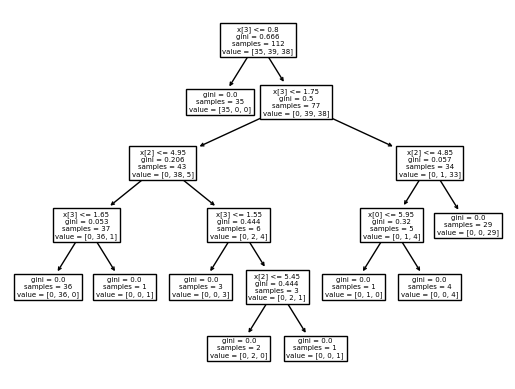

In [44]:
#tree plotting
tree.plot_tree(dt_clf)

In [45]:
#Decision making in decision tree
text_representation = tree.export_text(dt_clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



# 5. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)

In [47]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('Precision = ',precision_score(y_test,y_pred_rf,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_rf,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_rf))

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# Conclusion

Before scaling the dataset, linear kernel SVM, decision tree, and random forest models are the best since they have the maximum accuracy value.

# #Classification models after scaling the dataset

# Scaling

In [48]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
x1 = data.drop(['Classification'],axis=1)

In [50]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()

In [51]:
x1 = MinMax.fit_transform(x1)
x1 = pd.DataFrame(x1,columns=['SL','SW','PL','PW'])

In [52]:
x1.head()

,SL,SW,PL,PW
0,0.222222,0.743421,0.067797,0.041667
1,0.166667,0.480263,0.067797,0.041667
2,0.416667,0.585526,0.050847,0.041667
3,0.083333,0.532895,0.084746,0.041667
4,0.194444,0.796053,0.067797,0.041667


In [53]:
x1.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.502851,0.471186,0.457778
std,0.224602,0.214364,0.293123,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.375000,0.101695,0.083333
50%,0.416667,0.480263,0.567797,0.500000
75%,0.583333,0.625000,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [54]:
x2 = data['Classification']

In [55]:
x3 = pd.concat([x1,x2],axis=1)

In [56]:
x3.head()

,SL,SW,PL,PW,Classification
0,0.222222,0.743421,0.067797,0.041667,0
1,0.166667,0.480263,0.067797,0.041667,0
2,0.416667,0.585526,0.050847,0.041667,0
3,0.083333,0.532895,0.084746,0.041667,0
4,0.194444,0.796053,0.067797,0.041667,0


In [57]:
# splitting the data to train and test data
x1 = x3.drop(['Classification'],axis=1)
y1 = x3['Classification']

# 1.Logistic Regression

In [58]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.25,random_state=42)
logit_model = LogisticRegression()
logit_model.fit(x_train1,y_train1)
y_pred_lr1 = logit_model.predict(x_test1)

In [59]:
print('Accuracy = ',accuracy_score(y_test1,y_pred_lr1))
print('Precision = ',precision_score(y_test1,y_pred_lr1,average='macro'))
print('Recall = ',recall_score(y_test1,y_pred_lr1,average='macro'))
print('f1 score = ',f1_score(y_test1,y_pred_lr1,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test1,y_pred_lr1))

Accuracy =  0.9736842105263158
Precision =  0.9743589743589745
Recall =  0.9696969696969697
f1 score =  0.9707936507936509
Confusion matrix =
  [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


# 2.kNN

In [60]:
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    Classifier.fit(x_train1,y_train1)
    y_pred_knn1 = Classifier.predict(x_test1)
    acc = accuracy_score(y_test1,y_pred_knn1)
    metric.append(acc)

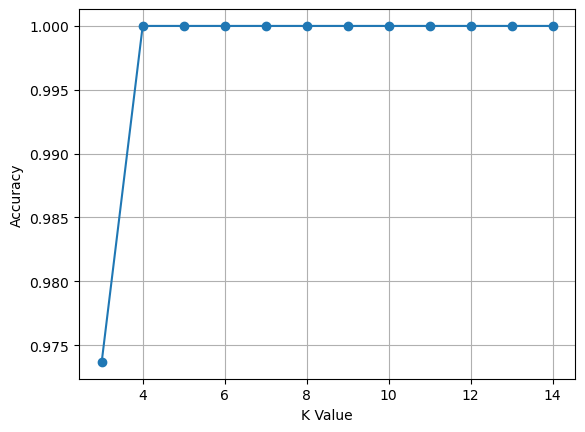

In [61]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()

In [62]:
Classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',p=2)
Classifier.fit(x_train1,y_train1)
y_pred_knn1 = Classifier.predict(x_test1)

In [63]:
print('Accuracy = ',accuracy_score(y_test1,y_pred_knn1))
print('Precision = ',precision_score(y_test1,y_pred_knn1,average='macro'))
print('Recall = ',recall_score(y_test1,y_pred_knn1,average='macro'))
print('f1 score = ',f1_score(y_test1,y_pred_knn1,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test1,y_pred_knn1))

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# 3.SVM Model

In [64]:
#Using linear kernel

svmclf = SVC(kernel='linear',random_state=42)
svmclf.fit(x_train1,y_train1)
y_pred_svm1=svmclf.predict(x_test1)

In [65]:
#Checking the accuracy of the model
print('Accuracy = ',accuracy_score(y_test1,y_pred_svm1))
print('Precision = ',precision_score(y_test1,y_pred_svm1,average='macro'))
print('Recall = ',recall_score(y_test1,y_pred_svm1,average='macro'))
print('f1 score = ',f1_score(y_test1,y_pred_svm1,average='macro'))
cm = confusion_matrix(y_test1,y_pred_svm1)
print('Confusion matrix =\n ',cm)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [66]:
#Using polynomial kernel

svmclf1 = SVC(kernel='poly',random_state=42)
svmclf1.fit(x_train1,y_train1)
y_pred_svm2=svmclf1.predict(x_test1)

In [67]:
print('Accuracy = ',accuracy_score(y_test1,y_pred_svm2))
print('Precision = ',precision_score(y_test1,y_pred_svm2,average='macro'))
print('Recall = ',recall_score(y_test1,y_pred_svm2,average='macro'))
print('f1 score = ',f1_score(y_test1,y_pred_svm2,average='macro'))
cm = confusion_matrix(y_test1,y_pred_svm2)
print('Confusion matrix =\n ',cm)

Accuracy =  0.9473684210526315
Precision =  0.9419191919191919
Recall =  0.9419191919191919
f1 score =  0.9419191919191919
Confusion matrix =
  [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


In [68]:
#Using radial basis function kernel

svmclf2 = SVC(kernel='rbf',random_state=42)
svmclf2.fit(x_train1,y_train1)
y_pred_svm3=svmclf2.predict(x_test1)

In [69]:
print('Accuracy = ',accuracy_score(y_test1,y_pred_svm3))
print('Precision = ',precision_score(y_test1,y_pred_svm3,average='macro'))
print('Recall = ',recall_score(y_test1,y_pred_svm3,average='macro'))
print('f1 score = ',f1_score(y_test1,y_pred_svm3,average='macro'))
cm = confusion_matrix(y_test1,y_pred_svm3)
print('Confusion matrix =\n ',cm)

Accuracy =  0.9736842105263158
Precision =  0.9743589743589745
Recall =  0.9696969696969697
f1 score =  0.9707936507936509
Confusion matrix =
  [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


# 4.Decision Tree

In [70]:
dt_clf1 = DecisionTreeClassifier(random_state=42)
dt_clf1.fit(x_train1,y_train1)
y_pred_dt1 = dt_clf1.predict(x_test1)

In [71]:
print('Accracy is: ',accuracy_score(y_test1,y_pred_dt1))
print('Precision = ',precision_score(y_test1,y_pred_dt1,average='macro'))
print('Recall = ',recall_score(y_test1,y_pred_dt1,average='macro'))
print('f1 score = ',f1_score(y_test1,y_pred_dt1,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test1,y_pred_dt1))

Accracy is:  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# 5.Random Forest

In [72]:
rf_clf1 = RandomForestClassifier(n_estimators=9,max_depth=20,criterion='gini',min_samples_split=3)
rf_clf1.fit(x_train1,y_train1)
y_pred_rf1 = rf_clf1.predict(x_test1)

In [73]:
print('Accuracy = ',accuracy_score(y_test1,y_pred_rf1))
print('Precision = ',precision_score(y_test1,y_pred_rf1,average='macro'))
print('Recall = ',recall_score(y_test1,y_pred_rf1,average='macro'))
print('f1 score = ',f1_score(y_test1,y_pred_rf1,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test1,y_pred_rf1))

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
Confusion matrix =
  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# Conclusion

After scaling the dataset, kNN,linear kernel SVM, decision tree, and random forest models are the best since they have the highest accuracy value.